In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

In [2]:
#下面是对数据进行处理的代码
data1 = load_svmlight_file("a9a.txt")
X_train, y_train = data1[0], data1[1]

data2=load_svmlight_file("a9a_t.txt")
X_test,y_test=data2[0],data2[1]

y_train[y_train==-1]=0
y_test[y_test==-1]=0

X_train=X_train.dot(np.eye(123))
X_train=np.column_stack((X_train,np.ones((32561,1))))

X_test=X_test.dot(np.eye(122))
X_test=np.column_stack((X_test,np.zeros((16281,1))))
X_test=np.column_stack((X_test,np.ones((16281,1))))

y_train=y_train.reshape(32561,1)
y_test=y_test.reshape(16281,1)

m_train=X_train.shape[0]
m_test=X_test.shape[0]


In [3]:
#定义sigmoid函数
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

#定义预测准确率函数
def predict(w,X,y):
    right=0
    p=X.dot(w)
    for i in range(X.shape[0]):
        if p[i]>=0:
            p[i]=1
        else:
            p[i]=0
        
    for j in range(X.shape[0]):
        if p[j]==y[j]:
            right=right+1
    P=right/X.shape[0]
    return P

Best result:  iteration 997,  accuracy 0.848351
Lowest loss:  iteration 998,  loss 0.330177


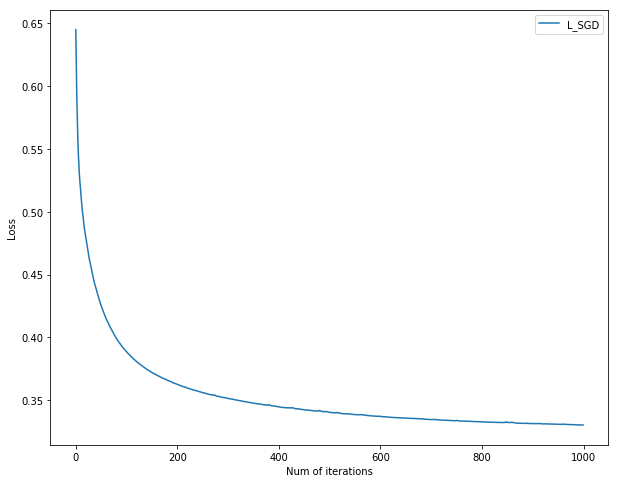

In [4]:
#定义学习率
alpha=0.1
#初始化所有参数，这里全部采用全零初始化
w_SGD=np.zeros((124,1))
G_SGD=np.zeros((124,1))
D_SGD=np.zeros((124,1))
L_SGD=np.zeros((1000,1))
P=np.zeros((1000,1))
#迭代1000次
for i in range(1000):
    z_x=np.zeros((300,124))
    z_y=np.zeros((300,1))
    for j in range(300):
        r = np.random.randint(m_train)
        z_x[j,:] = X_train[r,:]
        z_y[j]=y_train[r]
    for k in range(124):
        G_SGD[k]=((sigmoid(z_x.dot(w_SGD))-z_y).T).dot(z_x[:,k])
    G_SGD=G_SGD/300
    D_SGD=-G_SGD
    w_SGD=w_SGD+alpha*D_SGD
    for l in range(m_test):
        L_SGD[i]=L_SGD[i]-(y_test[l]*np.log(sigmoid((X_test[l,:].reshape(1,124)).dot(w_SGD)))+(1-y_test[l])*np.log(1-sigmoid((X_test[l,:].reshape(1,124)).dot(w_SGD))))
    L_SGD[i]=L_SGD[i]/m_test
    P[i]=predict(w_SGD,X_test,y_test)
print("Best result:  iteration %d,  accuracy %f" %(P.argmax()+1, P.max()))
print("Lowest loss:  iteration %d,  loss %f" %(L_SGD.argmin()+1, L_SGD.min()))
x=np.arange(0,1000,1)
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(x,L_SGD,label='L_SGD')
plt.legend(loc='upper right')
plt.xlabel('Num of iterations')
plt.ylabel('Loss')
plt.show()

Best result:  iteration 699,  accuracy 0.852098
Lowest loss:  iteration 413,  loss 0.323873


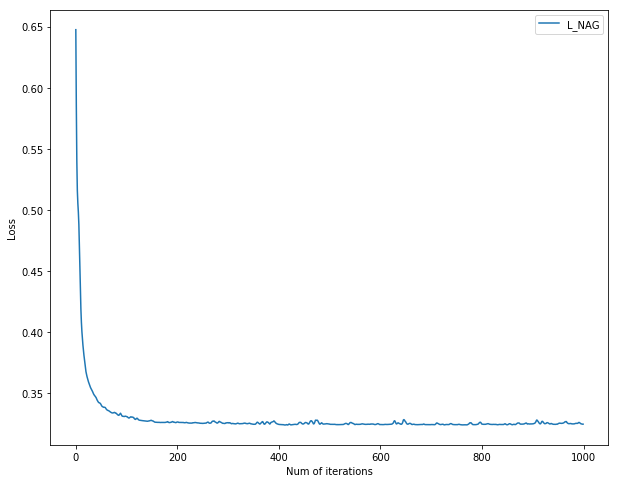

In [5]:
#定义学习率和一些超参数
alpha=0.1
gamma=0.9
#初始化所有参数，这里全部采用全零初始化
w_NAG=np.zeros((124,1))
G_NAG=np.zeros((124,1))
v_NAG=np.zeros((124,1))
L_NAG=np.zeros((1000,1))
P=np.zeros((1000,1))
#迭代1000次
for i in range(1000):
    z_x=np.zeros((300,124))
    z_y=np.zeros((300,1))
    for j in range(300):
        r = np.random.randint(m_train)
        z_x[j,:] = X_train[r,:]
        z_y[j]=y_train[r]
    for k in range(124):
        G_NAG[k]=((sigmoid(z_x.dot(w_NAG-gamma*v_NAG))-z_y).T).dot(z_x[:,k])
    G_NAG=G_NAG/300
    v_NAG=gamma*v_NAG+alpha*G_NAG
    w_NAG=w_NAG-v_NAG
    for l in range(m_test):
        L_NAG[i]=L_NAG[i]-(y_test[l]*np.log(sigmoid((X_test[l,:].reshape(1,124)).dot(w_NAG)))+(1-y_test[l])*np.log(1-sigmoid((X_test[l,:].reshape(1,124)).dot(w_NAG))))
    L_NAG[i]=L_NAG[i]/m_test
    P[i]=predict(w_NAG,X_test,y_test)
print("Best result:  iteration %d,  accuracy %f" %(P.argmax()+1, P.max()))
print("Lowest loss:  iteration %d,  loss %f" %(L_NAG.argmin()+1, L_NAG.min()))
x=np.arange(0,1000,1)
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(x,L_NAG,label='L_NAG')
plt.legend(loc='upper right')
plt.xlabel('Num of iterations')
plt.ylabel('Loss')
plt.show()

Best result:  iteration 988,  accuracy 0.849948
Lowest loss:  iteration 999,  loss 0.328353


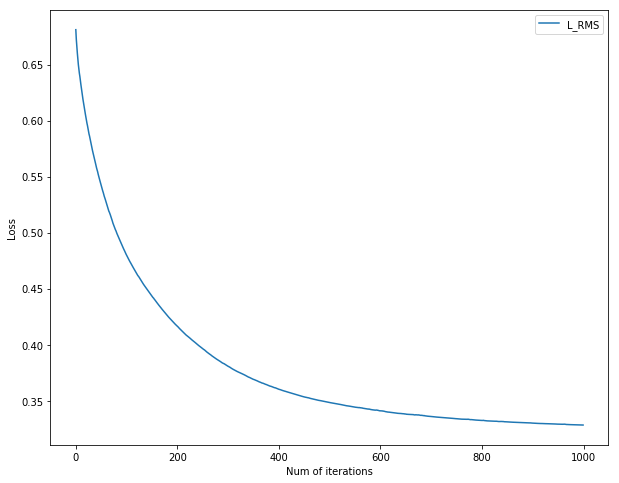

In [6]:
#定义学习率和一些超参数
alpha=0.001
gamma=0.9
epsilon=0.00000001
#初始化所有参数，这里全部采用全零初始化
w_RMS=np.zeros((124,1))
G_RMS=np.zeros((124,1))
g_RMS=np.zeros((124,1))
L_RMS=np.zeros((1000,1))
P=np.zeros((1000,1))
#迭代1000次
for i in range(1000):
    z_x=np.zeros((300,124))
    z_y=np.zeros((300,1))
    for j in range(300):
        r = np.random.randint(m_train)
        z_x[j,:] = X_train[r,:]
        z_y[j]=y_train[r]
    for k in range(124):
        g_RMS[k]=((sigmoid(z_x.dot(w_RMS))-z_y).T).dot(z_x[:,k])
    g_RMS=g_RMS/300
    G_RMS=gamma*G_RMS+(1-gamma)*g_RMS*g_RMS
    w_RMS=w_RMS-alpha/np.sqrt(G_RMS+epsilon)*g_RMS
    for l in range(m_test):
        L_RMS[i]=L_RMS[i]-(y_test[l]*np.log(sigmoid((X_test[l,:].reshape(1,124)).dot(w_RMS)))+(1-y_test[l])*np.log(1-sigmoid((X_test[l,:].reshape(1,124)).dot(w_RMS))))
    L_RMS[i]=L_RMS[i]/m_test
    P[i]=predict(w_RMS,X_test,y_test)
print("Best result:  iteration %d,  accuracy %f" %(P.argmax()+1, P.max()))
print("Lowest loss:  iteration %d,  loss %f" %(L_RMS.argmin()+1, L_RMS.min()))
x=np.arange(0,1000,1)
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(x,L_RMS,label='L_RMS')
plt.legend(loc='upper right')
plt.xlabel('Num of iterations')
plt.ylabel('Loss')
plt.show()

Best result:  iteration 819,  accuracy 0.852650
Lowest loss:  iteration 911,  loss 0.323587


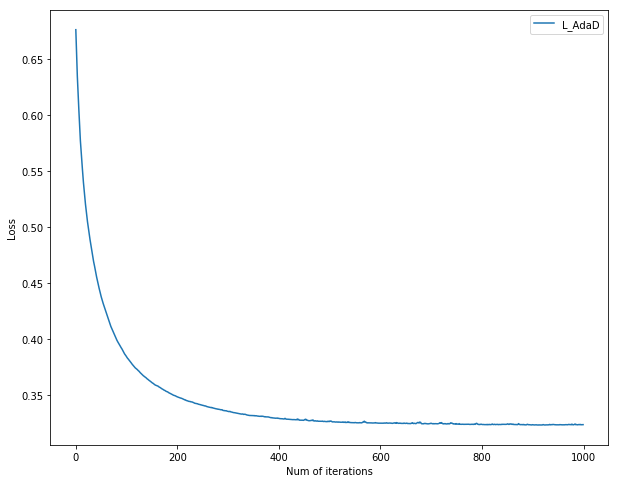

In [7]:
#定义一些超参数
gamma=0.95
epsilon=0.000001
#初始化所有参数，这里全部采用全零初始化
w_AdaD=np.zeros((124,1))
G_AdaD=np.zeros((124,1))
g_AdaD=np.zeros((124,1))
deltaT=np.zeros((124,1))
deltaW=np.zeros((124,1))
L_AdaD=np.zeros((1000,1))
P=np.zeros((1000,1))
#迭代1000次
for i in range(1000):
    z_x=np.zeros((300,124))
    z_y=np.zeros((300,1))
    for j in range(300):
        r = np.random.randint(m_train)
        z_x[j,:] = X_train[r,:]
        z_y[j]=y_train[r]
    for k in range(124):
        g_AdaD[k]=((sigmoid(z_x.dot(w_AdaD))-z_y).T).dot(z_x[:,k])
    g_AdaD=g_AdaD/300
    G_AdaD=gamma*G_AdaD+(1-gamma)*g_AdaD*g_AdaD
    deltaW=-np.sqrt((deltaT+epsilon)/(G_AdaD+epsilon))*g_AdaD
    w_AdaD=w_AdaD+deltaW
    deltaT=gamma*deltaT+(1-gamma)*deltaW*deltaW
    for l in range(m_test):
        L_AdaD[i]=L_AdaD[i]-(y_test[l]*np.log(sigmoid((X_test[l,:].reshape(1,124)).dot(w_AdaD)))+(1-y_test[l])*np.log(1-sigmoid((X_test[l,:].reshape(1,124)).dot(w_AdaD))))
    L_AdaD[i]=L_AdaD[i]/m_test
    P[i]=predict(w_AdaD,X_test,y_test)
print("Best result:  iteration %d,  accuracy %f" %(P.argmax()+1, P.max()))
print("Lowest loss:  iteration %d,  loss %f" %(L_AdaD.argmin()+1, L_AdaD.min()))
x=np.arange(0,1000,1)
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(x,L_AdaD,label='L_AdaD')
plt.legend(loc='upper right')
plt.xlabel('Num of iterations')
plt.ylabel('Loss')
plt.show()

Best result:  iteration 990,  accuracy 0.848904
Lowest loss:  iteration 1000,  loss 0.331318


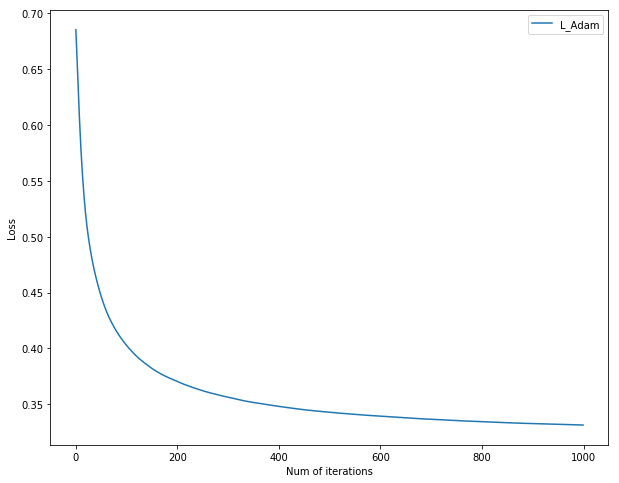

In [8]:
#定义一些超参数
eta=0.002
gamma=0.999
belta=0.9
epsilon=0.00000001
#初始化所有参数，这里全部采用全零初始化
w_Adam=np.zeros((124,1))
g_Adam=np.zeros((124,1))
mt=np.zeros((124,1))
G_Adam=np.zeros((124,1))
L_Adam=np.zeros((1000,1))
P=np.zeros((1000,1))
#迭代1000次
for i in range(1000):
    z_x=np.zeros((300,124))
    z_y=np.zeros((300,1))
    for j in range(300):
        r = np.random.randint(m_train)
        z_x[j,:] = X_train[r,:]
        z_y[j]=y_train[r]
    for k in range(124):
        g_Adam[k]=((sigmoid(z_x.dot(w_Adam))-z_y).T).dot(z_x[:,k])
    g_Adam=g_Adam/300
    mt=belta*mt+(1-belta)*g_Adam
    G_Adam=gamma*G_Adam+(1-gamma)*g_Adam*g_Adam
    alpha=eta*np.sqrt(1-gamma)/(1-belta)
    w_Adam=w_Adam-alpha*mt/np.sqrt(G_Adam+epsilon)
    for l in range(m_test):
        L_Adam[i]=L_Adam[i]-(y_test[l]*np.log(sigmoid((X_test[l,:].reshape(1,124)).dot(w_Adam)))+(1-y_test[l])*np.log(1-sigmoid((X_test[l,:].reshape(1,124)).dot(w_Adam))))
    L_Adam[i]=L_Adam[i]/m_test
    P[i]=predict(w_Adam,X_test,y_test)
print("Best result:  iteration %d,  accuracy %f" %(P.argmax()+1, P.max()))
print("Lowest loss:  iteration %d,  loss %f" %(L_Adam.argmin()+1, L_Adam.min()))
x=np.arange(0,1000,1)
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(x,L_Adam,label='L_Adam')
plt.legend(loc='upper right')
plt.xlabel('Num of iterations')
plt.ylabel('Loss')
plt.show()

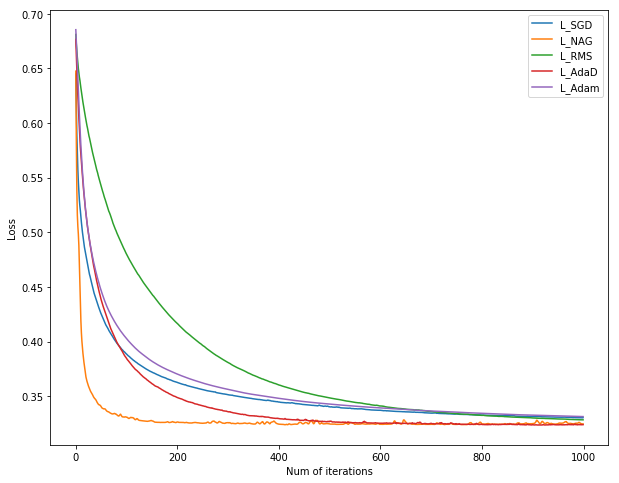

In [9]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(x,L_SGD,label='L_SGD')
plt.plot(x,L_NAG,label='L_NAG')
plt.plot(x,L_RMS,label='L_RMS')
plt.plot(x,L_AdaD,label='L_AdaD')
plt.plot(x,L_Adam,label='L_Adam')
plt.legend(loc='upper right')
plt.xlabel('Num of iterations')
plt.ylabel('Loss')
plt.show()